In [1]:
%load_ext rpy2.ipython

In [2]:
import pandas as pd
import scipy.io as io
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np
from matplotlib import gridspec
import seaborn as sns
import datetime
from datetime import datetime, timedelta
import pickle
import itertools
import glob

In [3]:
import matplotlib.dates as dates
from scipy import stats
from scipy.stats import variation
import math
from sklearn import preprocessing
from scipy.signal import butter, filtfilt
import itertools

In [4]:
import matplotlib.pyplot as plt
#font = {'family': 'serif', 'serif': ['Palatino']}
font = {'family': 'serif', 'serif': ['Helvetica']}
plt.rc('font', **font)
plt.rc('text', usetex=False)

In [5]:
label_fontsize = 16
title_fontsize = 16

In [6]:
#Set up parameters for figure display
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'axes.labelweight': 'bold',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

pylab.rcParams.update(params)
pylab.rcParams["font.family"] = "serif"
pylab.rcParams["font.weight"] = "heavy"
#pylab.rcParams.update({'figure.autolayout': True})

In [7]:
sns.set(font_scale=1.25, style="whitegrid")

In [8]:
base_dir = '/rds/project/tb419/rds-tb419-bekinschtein/Sri/SpatialAttention_Drowsiness/'
beh_files = 'decArsousalDecisionmaking_JNeuroscience2021/beh_data/csv_files/'
output_dir = 'decArsousalDecisionmaking_JNeuroscience2021/Figures/'

In [10]:
beh_file = 'RT_all.csv'
RT_data = pd.read_csv(base_dir+beh_files+beh_file)

In [11]:
RT_data.head()

,subj_idx,RT,state
0,2.0,1.074436,Alert
1,2.0,1.695064,Drowsy
2,4.0,0.723141,Alert
3,4.0,0.958894,Drowsy
4,5.0,0.675023,Alert


In [12]:
stat_data = RT_data.pivot(index='subj_idx', columns='state', values='RT')

In [13]:
stat_data.head()

state,Alert,Drowsy
subj_idx,,
2.0,1.074436,1.695064
4.0,0.723141,0.958894
5.0,0.675023,1.847254
6.0,1.151063,1.728288
7.0,0.862764,0.796802


In [48]:
print('Total subjects: ', len(stat_data))
print('subjects with drowsy RT > alert RT: ', np.sum(stat_data['Drowsy'] > stat_data['Alert']))

Total subjects:  32
subjects with drowsy RT > alert RT:  29


In [14]:
#Perform stats on the RT data..
from scipy import stats
t_stat,p_val = stats.ttest_rel(stat_data['Alert'], stat_data['Drowsy'])
df_test = len(stat_data)-1
print('Stats on RT data: t-val is ',round(t_stat,2), ' p_val is ',p_val, ' df is :', df_test)

Stats on RT data: t-val is  -7.78  p_val is  8.775348291894951e-09  df is : 31


In [16]:
pal = {Condition: "b" if Condition == 'Drowsy' else "r" for Condition in RT_data.state.unique()}

In [17]:
fig_dir = base_dir + output_dir
fig_dir

'/rds/project/tb419/rds-tb419-bekinschtein/Sri/SpatialAttention_Drowsiness/decArsousalDecisionmaking_JNeuroscience2021/Figures/'

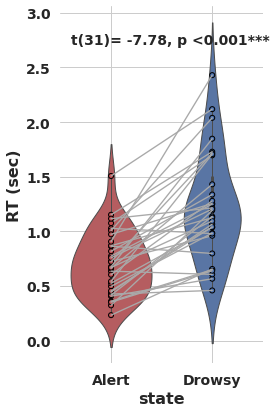

In [63]:
f, (ax1) = plt.subplots(ncols=1, sharex=True,figsize=(4, 6))

ax2 = sns.pointplot(x="state",y="RT",hue='subj_idx',data=RT_data, ax=ax1, dodge=0.0, scale = 0.5, 
                    markers = '', palette=['darkgray'])

ax2.legend_.remove()

ax3 = sns.violinplot(x="state",y="RT",data=RT_data, dodge=True, linewidth=1, ax = ax1, palette = pal)

ax4 = sns.stripplot(x="state",y="RT",data=RT_data, jitter=False, linewidth=1, ax=ax1,edgecolor ="black",
                     palette=pal)


string_val = 't(31)= ' + str(round(t_stat,2)) + ', p' + ' <0.001***'
ax1.text(-0.4, 2.75, string_val, va='center', fontweight='bold',rotation='horizontal', fontsize=label_fontsize-2)

plt.setp(ax1.collections, alpha=1)

sns.despine(left=True, bottom = True)

plt.ylabel('RT (sec)', fontsize=label_fontsize, weight = 'bold')
plt.xlabel('state', fontsize=label_fontsize, weight = 'bold')
ax1.tick_params(axis='both', which='major', labelsize=label_fontsize-2)
plt.tight_layout()
plt.box(False)
plt.grid(True)
plt.savefig(fig_dir + "RT_variability" + ".png", format='png', dpi=240, transparent=False)